In [249]:
#les imports
import pandas as pd                               
import numpy as np                                
import datetime                      

In [250]:
#lecture de la data
input_filename = 'les-arbres.csv'
data = pd.read_csv(input_filename, encoding='utf-8',sep = ';',parse_dates=['DATEPLANTATION'],dayfirst=True , infer_datetime_format=True , na_values=['-']) 
data.head(150)

,IDBASE,TYPEEMPLACEMENT,DOMANIALITE,ARRONDISSEMENT,COMPLEMENTADRESSE,NUMERO,LIEU / ADRESSE,IDEMPLACEMENT,CIRCONFERENCEENCM,HAUTEUR (m),STADEDEVELOPPEMENT,PEPINIERE,ESPECE,VARIETEOUCULTIVAR,GENRE,DATEPLANTATION,REMARQUABLE,LIBELLEFRANCAIS,OBJECTID,geo_point_2d
0,148212.0,Arbre,CIMETIERE,PARIS 17E ARRDT,NaN,NaN,CIMETIERE DES BATIGNOLLES / AVENUE CIRCULAIRE ...,A01500005019,217.0,13.0,M,Inconnue,hippocastanum,NaN,Aesculus,1700-01-01T01:02:49+00:53,0.0,Marronnier,17149,"48.8977659738, 2.31386228408"
1,151159.0,Arbre,CIMETIERE,PARIS 14E ARRDT,NaN,NaN,CIMETIERE DE MONTPARNASSE PETIT / DIV 26,D00000026012,195.0,13.0,NaN,Inconnue,altissima,NaN,Ailanthus,1700-01-01T01:02:49+00:53,NaN,Ailante,17154,"48.8370666812, 2.32901365777"
2,154990.0,Arbre,CIMETIERE,SEINE-SAINT-DENIS,NaN,NaN,CIMETIERE DE PANTIN / AVENUE DES NOISETIERS DE...,A07100016007,0.0,0.0,NaN,Inconnue,colurna,NaN,Corylus,1700-01-01T01:02:49+00:53,NaN,Noisetier de Byzance,17158,"48.9061296806, 2.40254975356"
3,161979.0,Arbre,CIMETIERE,VAL-DE-MARNE,NaN,NaN,CIMETIERE D'IVRY / AVENUE DU SUD / DIV 29,A10700029007,157.0,18.0,A,Inconnue,pseudoplatanus,NaN,Acer,1700-01-01T01:02:49+00:53,0.0,Erable,17168,"48.8086996235, 2.37204937366"
4,175498.0,Arbre,PRIVE,PARIS 16E ARRDT,ESPACE VERT PROTEGE,NaN,EVP N°16-65 / 38-44 AVENUE BUGEAUD,065014,0.0,0.0,NaN,Inconnue,hippocastanum,NaN,Aesculus,1700-01-01T01:02:49+00:53,NaN,Marronnier,17178,"48.8712759676, 2.28047576945"
5,183114.0,Arbre,PRIVE,PARIS 12E ARRDT,ESPACE VERT PROTEGE,NaN,EVP N°12-31 / HOPITAL ROTHSCHILD / 33 BOULEVAR...,031039,100.0,10.0,NaN,Inconnue,n. sp.,NaN,Tilia,1700-01-01T01:02:49+00:53,NaN,Tilleul,17183,"48.84386119, 2.39915598404"
6,189174.0,Arbre,DASCO,PARIS 15E ARRDT,NaN,NaN,BLOMET (19) MAT,09510005,55.0,5.0,J,Inconnue,x carnea,NaN,Aesculus,1700-01-01T01:02:49+00:53,0.0,Marronnier,17190,"48.8429824109, 2.30749878402"
7,194891.0,Arbre,PERIPHERIQUE,PARIS 17E ARRDT,NaN,NaN,TALUS N°17-01,091701010,90.0,10.0,NaN,Inconnue,nigra,'Italica',Populus,1700-01-01T01:02:49+00:53,NaN,Peuplier,17198,"48.8826433275, 2.28372667659"
8,197974.0,Arbre,DJS,PARIS 13E ARRDT,NaN,NaN,CENTRE SPORTIF GEORGES CARPENTIER / 81 BOULEVA...,00010372,120.0,8.0,A,Inconnue,x europaea,'Euchlora',Tilia,1700-01-01T01:02:49+00:53,NaN,Tilleul,17205,"48.8194622342, 2.36722529494"
9,256345.0,Arbre,Alignement,PARIS 14E ARRDT,NaN,NaN,AVENUE DU GENERAL LECLERC,001101005,155.0,15.0,A,Inconnue,x hispanica,NaN,Platanus,1700-01-01T01:02:49+00:53,0.0,Platane,17215,"48.8272349885, 2.32676720576"


In [251]:
#liste des columns
data.columns

Index(['IDBASE', 'TYPEEMPLACEMENT', 'DOMANIALITE', 'ARRONDISSEMENT',
       'COMPLEMENTADRESSE', 'NUMERO', 'LIEU / ADRESSE', 'IDEMPLACEMENT',
       'CIRCONFERENCEENCM', 'HAUTEUR (m)', 'STADEDEVELOPPEMENT', 'PEPINIERE',
       'ESPECE', 'VARIETEOUCULTIVAR', 'GENRE', 'DATEPLANTATION', 'REMARQUABLE',
       'LIBELLEFRANCAIS', 'OBJECTID', 'geo_point_2d'],
      dtype='object')

In [252]:
#on split la columns dateplantation pour la travailler
time_df = data["DATEPLANTATION"].str.split( expand = True ,  n = 1) 
                 
time_df.head()

,0
0,1700-01-01T01:02:49+00:53
1,1700-01-01T01:02:49+00:53
2,1700-01-01T01:02:49+00:53
3,1700-01-01T01:02:49+00:53
4,1700-01-01T01:02:49+00:53


In [253]:
time_df.columns = ["time"]
time_df.head()

,time
0,1700-01-01T01:02:49+00:53
1,1700-01-01T01:02:49+00:53
2,1700-01-01T01:02:49+00:53
3,1700-01-01T01:02:49+00:53
4,1700-01-01T01:02:49+00:53


In [254]:
time_df['time'].str.contains('....-..-..', regex=True)

0          True
1          True
2          True
3          True
4          True
5          True
6          True
7          True
8          True
9          True
10         True
11         True
12         True
13         True
14         True
15         True
16        False
17         True
18         True
19         True
20         True
21         True
22         True
23         True
24         True
25         True
26         True
27         True
28         True
29         True
          ...  
222140     True
222141     True
222142     True
222143     True
222144     True
222145     True
222146     True
222147     True
222148     True
222149     True
222150     True
222151     True
222152    False
222153     True
222154     True
222155     True
222156     True
222157    False
222158     True
222159     True
222160    False
222161     True
222162     True
222163     True
222164     True
222165     True
222166     True
222167     True
222168     True
222169     True
Name: time, Length: 2221

In [255]:
time_df['date_plantation'] = time_df['time'].str.extract('(....-..-..)', expand=True)
time_df['date_plantation']

0         1700-01-01
1         1700-01-01
2         1700-01-01
3         1700-01-01
4         1700-01-01
5         1700-01-01
6         1700-01-01
7         1700-01-01
8         1700-01-01
9         1700-01-01
10        1700-01-01
11        1700-01-01
12        1700-01-01
13        1700-01-01
14        1974-12-15
15        1700-01-01
16               NaN
17        2016-02-12
18        2016-04-05
19        2016-01-15
20        1986-01-01
21        1700-01-01
22        1996-02-15
23        1989-10-30
24        1996-03-25
25        1700-01-01
26        2005-01-01
27        2007-01-01
28        2005-01-01
29        1700-01-01
             ...    
222140    1700-01-01
222141    1700-01-01
222142    1700-01-01
222143    1700-01-01
222144    1700-01-01
222145    1700-01-01
222146    1700-01-01
222147    1700-01-01
222148    1700-01-01
222149    1994-02-21
222150    1700-01-01
222151    1700-01-01
222152           NaN
222153    1700-01-01
222154    1700-01-01
222155    1700-01-01
222156    201

In [256]:
time_df.head()

,time,date_plantation
0,1700-01-01T01:02:49+00:53,1700-01-01
1,1700-01-01T01:02:49+00:53,1700-01-01
2,1700-01-01T01:02:49+00:53,1700-01-01
3,1700-01-01T01:02:49+00:53,1700-01-01
4,1700-01-01T01:02:49+00:53,1700-01-01


In [257]:
#On recupére et place dans df
df = pd.concat([data, time_df], axis=1)
df[:]

,IDBASE,TYPEEMPLACEMENT,DOMANIALITE,ARRONDISSEMENT,COMPLEMENTADRESSE,NUMERO,LIEU / ADRESSE,IDEMPLACEMENT,CIRCONFERENCEENCM,HAUTEUR (m),...,ESPECE,VARIETEOUCULTIVAR,GENRE,DATEPLANTATION,REMARQUABLE,LIBELLEFRANCAIS,OBJECTID,geo_point_2d,time,date_plantation
0,148212.0,Arbre,CIMETIERE,PARIS 17E ARRDT,NaN,NaN,CIMETIERE DES BATIGNOLLES / AVENUE CIRCULAIRE ...,A01500005019,217.0,13.0,...,hippocastanum,NaN,Aesculus,1700-01-01T01:02:49+00:53,0.0,Marronnier,17149,"48.8977659738, 2.31386228408",1700-01-01T01:02:49+00:53,1700-01-01
1,151159.0,Arbre,CIMETIERE,PARIS 14E ARRDT,NaN,NaN,CIMETIERE DE MONTPARNASSE PETIT / DIV 26,D00000026012,195.0,13.0,...,altissima,NaN,Ailanthus,1700-01-01T01:02:49+00:53,NaN,Ailante,17154,"48.8370666812, 2.32901365777",1700-01-01T01:02:49+00:53,1700-01-01
2,154990.0,Arbre,CIMETIERE,SEINE-SAINT-DENIS,NaN,NaN,CIMETIERE DE PANTIN / AVENUE DES NOISETIERS DE...,A07100016007,0.0,0.0,...,colurna,NaN,Corylus,1700-01-01T01:02:49+00:53,NaN,Noisetier de Byzance,17158,"48.9061296806, 2.40254975356",1700-01-01T01:02:49+00:53,1700-01-01
3,161979.0,Arbre,CIMETIERE,VAL-DE-MARNE,NaN,NaN,CIMETIERE D'IVRY / AVENUE DU SUD / DIV 29,A10700029007,157.0,18.0,...,pseudoplatanus,NaN,Acer,1700-01-01T01:02:49+00:53,0.0,Erable,17168,"48.8086996235, 2.37204937366",1700-01-01T01:02:49+00:53,1700-01-01
4,175498.0,Arbre,PRIVE,PARIS 16E ARRDT,ESPACE VERT PROTEGE,NaN,EVP N°16-65 / 38-44 AVENUE BUGEAUD,065014,0.0,0.0,...,hippocastanum,NaN,Aesculus,1700-01-01T01:02:49+00:53,NaN,Marronnier,17178,"48.8712759676, 2.28047576945",1700-01-01T01:02:49+00:53,1700-01-01
5,183114.0,Arbre,PRIVE,PARIS 12E ARRDT,ESPACE VERT PROTEGE,NaN,EVP N°12-31 / HOPITAL ROTHSCHILD / 33 BOULEVAR...,031039,100.0,10.0,...,n. sp.,NaN,Tilia,1700-01-01T01:02:49+00:53,NaN,Tilleul,17183,"48.84386119, 2.39915598404",1700-01-01T01:02:49+00:53,1700-01-01
6,189174.0,Arbre,DASCO,PARIS 15E ARRDT,NaN,NaN,BLOMET (19) MAT,09510005,55.0,5.0,...,x carnea,NaN,Aesculus,1700-01-01T01:02:49+00:53,0.0,Marronnier,17190,"48.8429824109, 2.30749878402",1700-01-01T01:02:49+00:53,1700-01-01
7,194891.0,Arbre,PERIPHERIQUE,PARIS 17E ARRDT,NaN,NaN,TALUS N°17-01,091701010,90.0,10.0,...,nigra,'Italica',Populus,1700-01-01T01:02:49+00:53,NaN,Peuplier,17198,"48.8826433275, 2.28372667659",1700-01-01T01:02:49+00:53,1700-01-01
8,197974.0,Arbre,DJS,PARIS 13E ARRDT,NaN,NaN,CENTRE SPORTIF GEORGES CARPENTIER / 81 BOULEVA...,00010372,120.0,8.0,...,x europaea,'Euchlora',Tilia,1700-01-01T01:02:49+00:53,NaN,Tilleul,17205,"48.8194622342, 2.36722529494",1700-01-01T01:02:49+00:53,1700-01-01
9,256345.0,Arbre,Alignement,PARIS 14E ARRDT,NaN,NaN,AVENUE DU GENERAL LECLERC,001101005,155.0,15.0,...,x hispanica,NaN,Platanus,1700-01-01T01:02:49+00:53,0.0,Platane,17215,"48.8272349885, 2.32676720576",1700-01-01T01:02:49+00:53,1700-01-01


In [258]:
#on split les point geo pour les travailler
geo_df = data["geo_point_2d"].str.split(',', expand = True ,  n = 1 ) 
                 
geo_df.head()

,0,1
0,48.8977659738,2.31386228408
1,48.8370666812,2.32901365777
2,48.9061296806,2.40254975356
3,48.8086996235,2.37204937366
4,48.8712759676,2.28047576945


In [259]:
geo_df.columns = ["latitude","longitude"]
geo_df.head()

,latitude,longitude
0,48.8977659738,2.31386228408
1,48.8370666812,2.32901365777
2,48.9061296806,2.40254975356
3,48.8086996235,2.37204937366
4,48.8712759676,2.28047576945


In [260]:
#on fusionne avec la df
df_data = pd.concat([df, geo_df], axis=1)
df_data[:]

,IDBASE,TYPEEMPLACEMENT,DOMANIALITE,ARRONDISSEMENT,COMPLEMENTADRESSE,NUMERO,LIEU / ADRESSE,IDEMPLACEMENT,CIRCONFERENCEENCM,HAUTEUR (m),...,GENRE,DATEPLANTATION,REMARQUABLE,LIBELLEFRANCAIS,OBJECTID,geo_point_2d,time,date_plantation,latitude,longitude
0,148212.0,Arbre,CIMETIERE,PARIS 17E ARRDT,NaN,NaN,CIMETIERE DES BATIGNOLLES / AVENUE CIRCULAIRE ...,A01500005019,217.0,13.0,...,Aesculus,1700-01-01T01:02:49+00:53,0.0,Marronnier,17149,"48.8977659738, 2.31386228408",1700-01-01T01:02:49+00:53,1700-01-01,48.8977659738,2.31386228408
1,151159.0,Arbre,CIMETIERE,PARIS 14E ARRDT,NaN,NaN,CIMETIERE DE MONTPARNASSE PETIT / DIV 26,D00000026012,195.0,13.0,...,Ailanthus,1700-01-01T01:02:49+00:53,NaN,Ailante,17154,"48.8370666812, 2.32901365777",1700-01-01T01:02:49+00:53,1700-01-01,48.8370666812,2.32901365777
2,154990.0,Arbre,CIMETIERE,SEINE-SAINT-DENIS,NaN,NaN,CIMETIERE DE PANTIN / AVENUE DES NOISETIERS DE...,A07100016007,0.0,0.0,...,Corylus,1700-01-01T01:02:49+00:53,NaN,Noisetier de Byzance,17158,"48.9061296806, 2.40254975356",1700-01-01T01:02:49+00:53,1700-01-01,48.9061296806,2.40254975356
3,161979.0,Arbre,CIMETIERE,VAL-DE-MARNE,NaN,NaN,CIMETIERE D'IVRY / AVENUE DU SUD / DIV 29,A10700029007,157.0,18.0,...,Acer,1700-01-01T01:02:49+00:53,0.0,Erable,17168,"48.8086996235, 2.37204937366",1700-01-01T01:02:49+00:53,1700-01-01,48.8086996235,2.37204937366
4,175498.0,Arbre,PRIVE,PARIS 16E ARRDT,ESPACE VERT PROTEGE,NaN,EVP N°16-65 / 38-44 AVENUE BUGEAUD,065014,0.0,0.0,...,Aesculus,1700-01-01T01:02:49+00:53,NaN,Marronnier,17178,"48.8712759676, 2.28047576945",1700-01-01T01:02:49+00:53,1700-01-01,48.8712759676,2.28047576945
5,183114.0,Arbre,PRIVE,PARIS 12E ARRDT,ESPACE VERT PROTEGE,NaN,EVP N°12-31 / HOPITAL ROTHSCHILD / 33 BOULEVAR...,031039,100.0,10.0,...,Tilia,1700-01-01T01:02:49+00:53,NaN,Tilleul,17183,"48.84386119, 2.39915598404",1700-01-01T01:02:49+00:53,1700-01-01,48.84386119,2.39915598404
6,189174.0,Arbre,DASCO,PARIS 15E ARRDT,NaN,NaN,BLOMET (19) MAT,09510005,55.0,5.0,...,Aesculus,1700-01-01T01:02:49+00:53,0.0,Marronnier,17190,"48.8429824109, 2.30749878402",1700-01-01T01:02:49+00:53,1700-01-01,48.8429824109,2.30749878402
7,194891.0,Arbre,PERIPHERIQUE,PARIS 17E ARRDT,NaN,NaN,TALUS N°17-01,091701010,90.0,10.0,...,Populus,1700-01-01T01:02:49+00:53,NaN,Peuplier,17198,"48.8826433275, 2.28372667659",1700-01-01T01:02:49+00:53,1700-01-01,48.8826433275,2.28372667659
8,197974.0,Arbre,DJS,PARIS 13E ARRDT,NaN,NaN,CENTRE SPORTIF GEORGES CARPENTIER / 81 BOULEVA...,00010372,120.0,8.0,...,Tilia,1700-01-01T01:02:49+00:53,NaN,Tilleul,17205,"48.8194622342, 2.36722529494",1700-01-01T01:02:49+00:53,1700-01-01,48.8194622342,2.36722529494
9,256345.0,Arbre,Alignement,PARIS 14E ARRDT,NaN,NaN,AVENUE DU GENERAL LECLERC,001101005,155.0,15.0,...,Platanus,1700-01-01T01:02:49+00:53,0.0,Platane,17215,"48.8272349885, 2.32676720576",1700-01-01T01:02:49+00:53,1700-01-01,48.8272349885,2.32676720576


In [261]:
#on selection nos columns
df = pd.melt(df_data, id_vars=["LIEU / ADRESSE", "CIRCONFERENCEENCM","ARRONDISSEMENT", "HAUTEUR (m)", "LIBELLEFRANCAIS","date_plantation","latitude","longitude"], var_name="day_raw")
df.head(10)

,LIEU / ADRESSE,CIRCONFERENCEENCM,ARRONDISSEMENT,HAUTEUR (m),LIBELLEFRANCAIS,date_plantation,latitude,longitude,day_raw,value
0,CIMETIERE DES BATIGNOLLES / AVENUE CIRCULAIRE ...,217.0,PARIS 17E ARRDT,13.0,Marronnier,1700-01-01,48.8977659738,2.31386228408,IDBASE,148212
1,CIMETIERE DE MONTPARNASSE PETIT / DIV 26,195.0,PARIS 14E ARRDT,13.0,Ailante,1700-01-01,48.8370666812,2.32901365777,IDBASE,151159
2,CIMETIERE DE PANTIN / AVENUE DES NOISETIERS DE...,0.0,SEINE-SAINT-DENIS,0.0,Noisetier de Byzance,1700-01-01,48.9061296806,2.40254975356,IDBASE,154990
3,CIMETIERE D'IVRY / AVENUE DU SUD / DIV 29,157.0,VAL-DE-MARNE,18.0,Erable,1700-01-01,48.8086996235,2.37204937366,IDBASE,161979
4,EVP N°16-65 / 38-44 AVENUE BUGEAUD,0.0,PARIS 16E ARRDT,0.0,Marronnier,1700-01-01,48.8712759676,2.28047576945,IDBASE,175498
5,EVP N°12-31 / HOPITAL ROTHSCHILD / 33 BOULEVAR...,100.0,PARIS 12E ARRDT,10.0,Tilleul,1700-01-01,48.84386119,2.39915598404,IDBASE,183114
6,BLOMET (19) MAT,55.0,PARIS 15E ARRDT,5.0,Marronnier,1700-01-01,48.8429824109,2.30749878402,IDBASE,189174
7,TALUS N°17-01,90.0,PARIS 17E ARRDT,10.0,Peuplier,1700-01-01,48.8826433275,2.28372667659,IDBASE,194891
8,CENTRE SPORTIF GEORGES CARPENTIER / 81 BOULEVA...,120.0,PARIS 13E ARRDT,8.0,Tilleul,1700-01-01,48.8194622342,2.36722529494,IDBASE,197974
9,AVENUE DU GENERAL LECLERC,155.0,PARIS 14E ARRDT,15.0,Platane,1700-01-01,48.8272349885,2.32676720576,IDBASE,256345


In [262]:
#on enregistre notre nouvelle csv
df.to_csv('new_arbres.csv', index=False)

In [141]:
df.isnull().any()

LIEU / ADRESSE       False
CIRCONFERENCEENCM    False
HAUTEUR (m)          False
LIBELLEFRANCAIS      False
date_plantation      False
latitude             False
longitude            False
day_raw              False
value                False
dtype: bool

In [161]:
df.head(10)

,LIEU / ADRESSE,CIRCONFERENCEENCM,HAUTEUR (m),LIBELLEFRANCAIS,date_plantation,latitude,longitude,day_raw,value
0,CIMETIERE DES BATIGNOLLES / AVENUE CIRCULAIRE ...,217.0,13.0,Marronnier,1700-01-01,48.8977659738,2.31386228408,IDBASE,148212
1,CIMETIERE DE MONTPARNASSE PETIT / DIV 26,195.0,13.0,Ailante,1700-01-01,48.8370666812,2.32901365777,IDBASE,151159
2,CIMETIERE DE PANTIN / AVENUE DES NOISETIERS DE...,0.0,0.0,Noisetier de Byzance,1700-01-01,48.9061296806,2.40254975356,IDBASE,154990
3,CIMETIERE D'IVRY / AVENUE DU SUD / DIV 29,157.0,18.0,Erable,1700-01-01,48.8086996235,2.37204937366,IDBASE,161979
4,EVP N°16-65 / 38-44 AVENUE BUGEAUD,0.0,0.0,Marronnier,1700-01-01,48.8712759676,2.28047576945,IDBASE,175498
5,EVP N°12-31 / HOPITAL ROTHSCHILD / 33 BOULEVAR...,100.0,10.0,Tilleul,1700-01-01,48.84386119,2.39915598404,IDBASE,183114
6,BLOMET (19) MAT,55.0,5.0,Marronnier,1700-01-01,48.8429824109,2.30749878402,IDBASE,189174
7,TALUS N°17-01,90.0,10.0,Peuplier,1700-01-01,48.8826433275,2.28372667659,IDBASE,194891
8,CENTRE SPORTIF GEORGES CARPENTIER / 81 BOULEVA...,120.0,8.0,Tilleul,1700-01-01,48.8194622342,2.36722529494,IDBASE,197974
9,AVENUE DU GENERAL LECLERC,155.0,15.0,Platane,1700-01-01,48.8272349885,2.32676720576,IDBASE,256345


In [214]:
df.LIBELLEFRANCAIS.value_counts()

Platane                 774216
Marronnier              485928
Tilleul                 402192
Erable                  365130
Sophora                 214992
Frêne                    94266
Pin                      91242
Micocoulier              75024
Cerisier à fleurs        72792
Chêne                    69786
Peuplier                 68382
Charme                   63594
Poirier à fleurs         61506
Noisetier de Byzance     60210
Robinier                 52488
Bouleau                  47304
If                       40878
Orme                     37980
Hêtre                    35802
Ailante                  27180
Paulownia                26910
Fevier                   24930
Cyprès                   23580
Magnolia                 22698
Faux-cyprès              22194
Tulipier                 21006
Prunier à fleurs         20592
Noyer                    20322
Non spécifié             20214
Arbre de Judée           19728
                         ...  
Myrte du Chili              36
Nerprun 

In [ ]:
#on plot les 10 meilleurs essences

In [263]:
import matplotlib.pyplot as plt
import re
import seaborn as sns
import os
import urllib

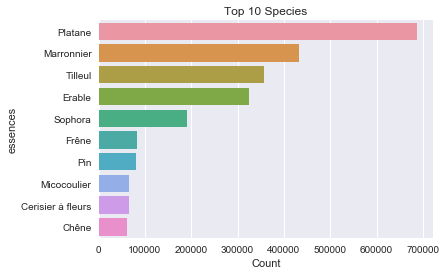

In [264]:
top10essences = df.groupby(['LIBELLEFRANCAIS'])[['LIBELLEFRANCAIS']].count().add_suffix('_count'). \
  sort_values(by="LIBELLEFRANCAIS_count",ascending=False).reset_index().head(10)
ax = sns.barplot(y="LIBELLEFRANCAIS",x="LIBELLEFRANCAIS_count",data=top10essences)
ax.set(xlabel="Count", ylabel="essences", title="Top 10 Species")

